# Changing Distribution

- **Created by Andrés Segura Tinoco**
- **Created on Oct 3, 2019**

In [1]:
# Load the Python libraries
import numpy as np
import math
from scipy import stats

In [2]:
# Load plotting libraries
import matplotlib.pyplot as plt

## Creating a toy uniform distribution 

In [3]:
# Initialize variables
n = 256
data_raw = [25] * n
total = sum(data_raw)
print('Total values:', total)

Total values: 6400


In [4]:
# Creating target distribution
alpha = 0.02
t_func = stats.norm(n/2, alpha*n)
x = np.linspace(0, n, n)
y = t_func.pdf(x) * total

In [5]:
# Create pretty x axis labels
def get_x_labels(n):
    x_labels = []
    for ix in range(n):
        if ix % 10 == 0:
            x_labels.append(str(ix))
        else:
            x_labels.append('')
    return x_labels

In [6]:
# Function that plots a symbol distribution
def plot_symbol_dist(data, x, y):
    
    # Prepare data
    n = len(data)
    y_pos = np.arange(n)
    symbols = get_x_labels(n)
    
    # Plot distribution
    plt.figure(figsize = (16, 8))
    plt.plot(x, y, '-', color = '#ff7f0e', lw = 3, label = 'Real distribution')
    plt.bar(y_pos, data, align='center', alpha=0.5)
    plt.xticks(y_pos, symbols, fontsize = 10, rotation = 50)
    plt.ylabel('Value')
    plt.title('Distribution')
    plt.show()

In [7]:
# Function that calculates the new distribution
def get_new_dist(data_raw, y):
    a = []
    b = []
    n = len(data_raw)
    
    carry = 0
    for i in range(n // 2):
        y1 = data_raw[i] + carry
        y2 = max(math.floor(y[i]), 1)
        y_new = min(y1, y2)
        a.append(y_new)
        carry = y1 - y_new
    print('Forward carry:', carry)
    
    for i in range(n - 1, n // 2 - 1, -1):
        y1 = data_raw[i] + carry
        y2 = max(math.floor(y[i]), 1)
        y_new = min(y1, y2)
        b.append(y_new)
        carry = y1 - y_new    
    print('backward carry:', carry)
    
    # Concatenate arrays
    data_new = a + b[::-1]
    return data_new

## Plot current distribution

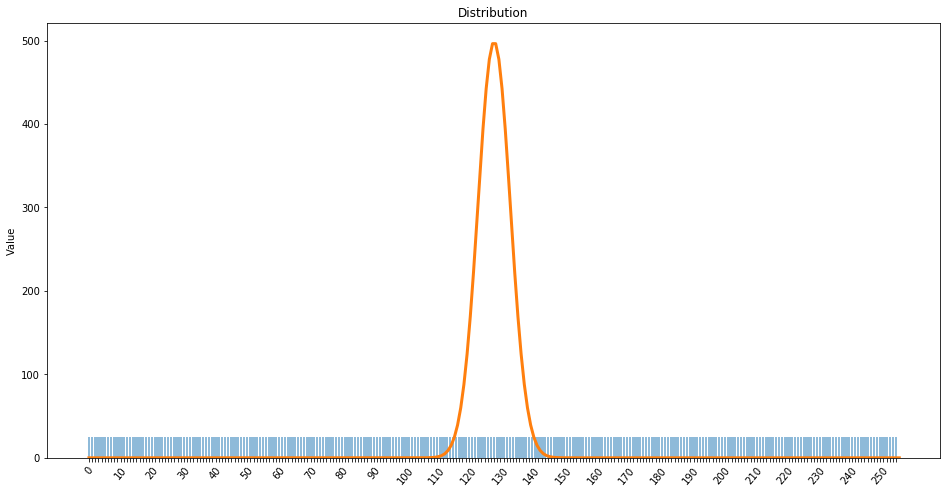

In [8]:
plot_symbol_dist(data_raw, x, y)

## Calculate and Plot new distribution (Normal)

In [9]:
data_new = get_new_dist(data_raw, y)
print('n temp:', len(data_new))

Forward carry: 0
backward carry: 0
n temp: 256


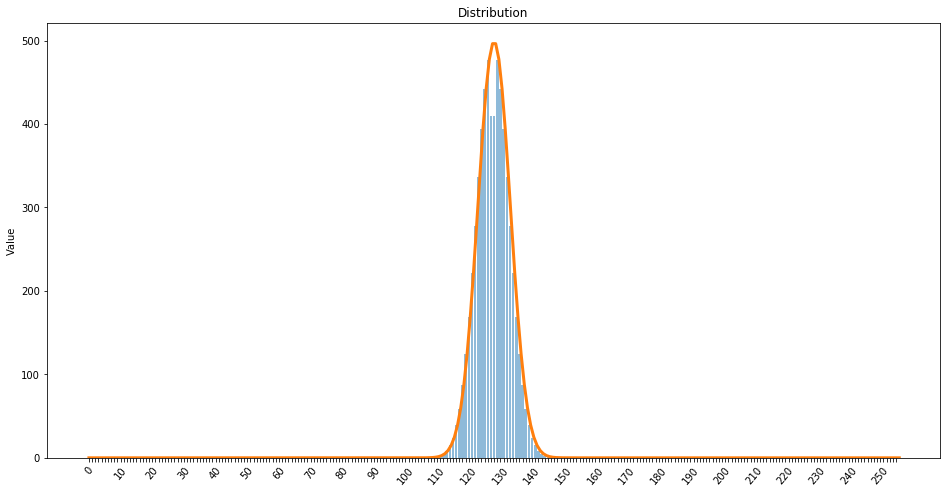

In [10]:
plot_symbol_dist(data_new, x, y)

## Validation

In [11]:
# Difference between distributions
print('Diff:', total - sum(data_new))

Diff: 0


<hr>
<p><a href="https://ansegura7.github.io/Algorithms/">« Home</a></p>